# Converting Data from Qualitative Features to Fully Quantatative
Using mapping :)
Dataset found in Confluence


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
label_encoder = LabelEncoder()

data = pd.read_csv("train_data 2.csv")
dropper = ["case_id", "Hospital_code", "patientid"]

data = data.drop(dropper, axis=1)
dataVal = data.values
for i in range(len(data.columns)):
  if isinstance(dataVal[0,i], str):
    print("Column: " + data.columns[i])
    data[data.columns[i]] = label_encoder.fit_transform(data[data.columns[i]])
    mapping_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Dictionary:")
    print(mapping_dict)


y_train = data["Stay"].values
xdf = data.drop("Stay", axis=1)
columns = xdf.columns
x_train = xdf.values



Column: Hospital_type_code
Dictionary:
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
Column: Hospital_region_code
Dictionary:
{'X': 0, 'Y': 1, 'Z': 2}
Column: Department
Dictionary:
{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
Column: Ward_Type
Dictionary:
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
Column: Ward_Facility_Code
Dictionary:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
Column: Type of Admission
Dictionary:
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
Column: Severity of Illness
Dictionary:
{'Extreme': 0, 'Minor': 1, 'Moderate': 2}
Column: Age
Dictionary:
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
Column: Stay
Dictionary:
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


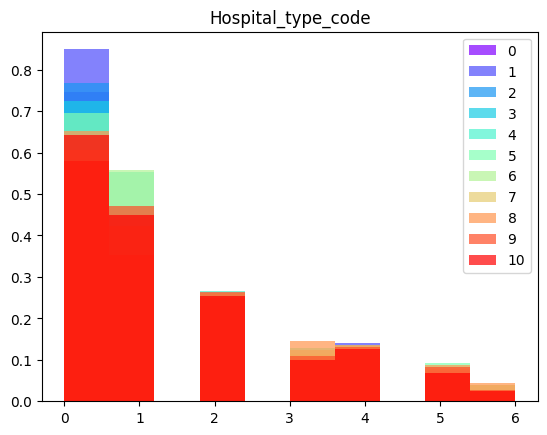

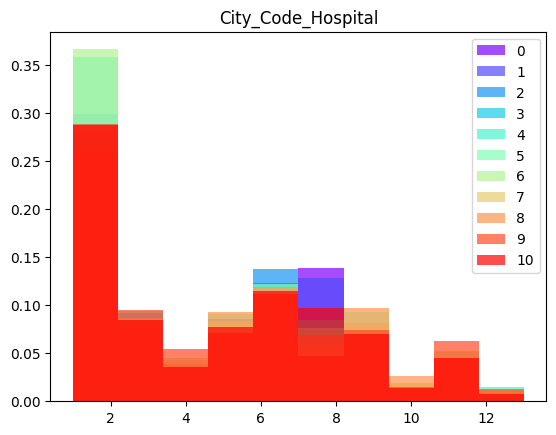

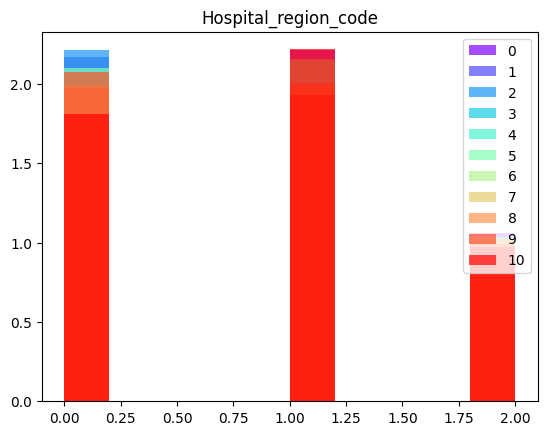

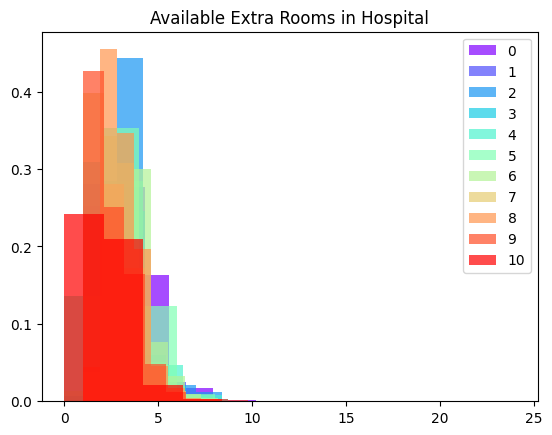

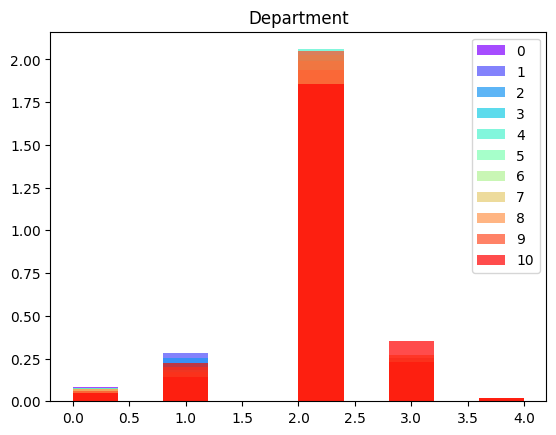

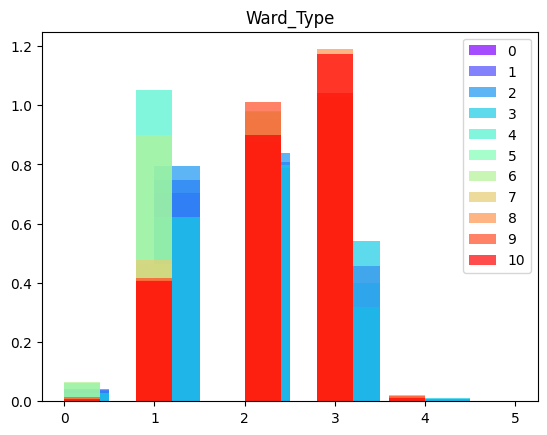

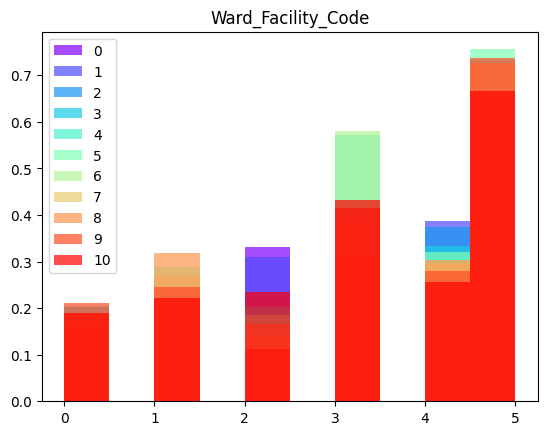

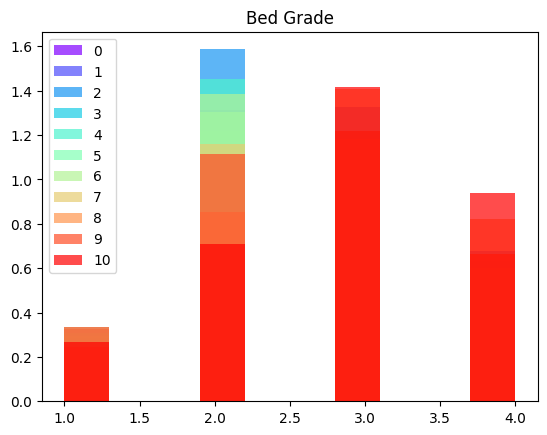

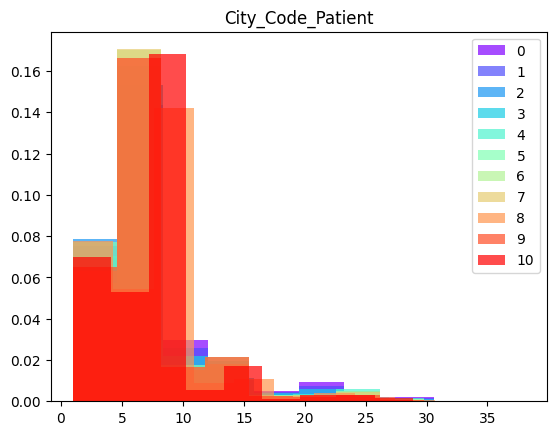

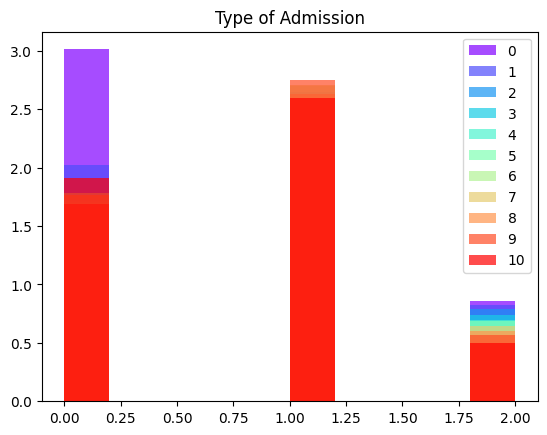

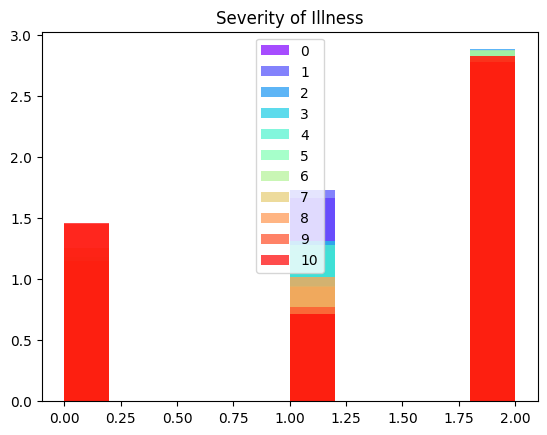

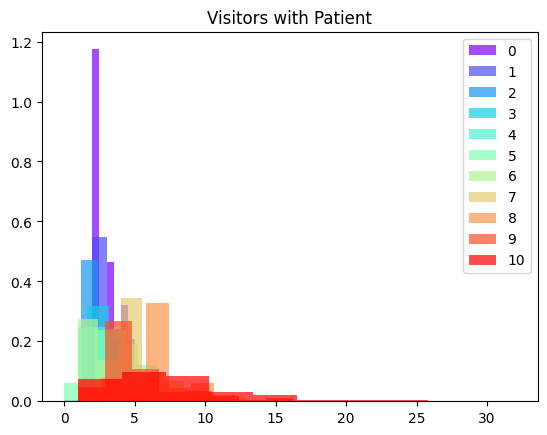

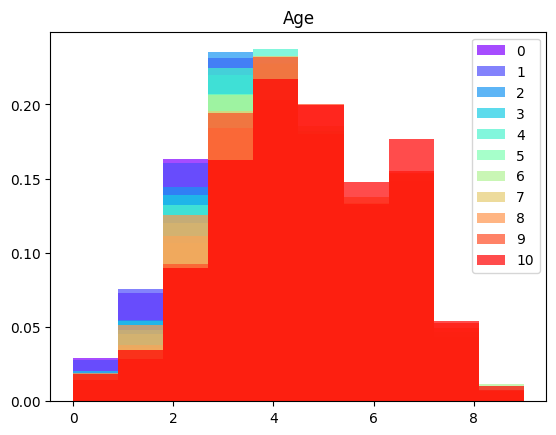

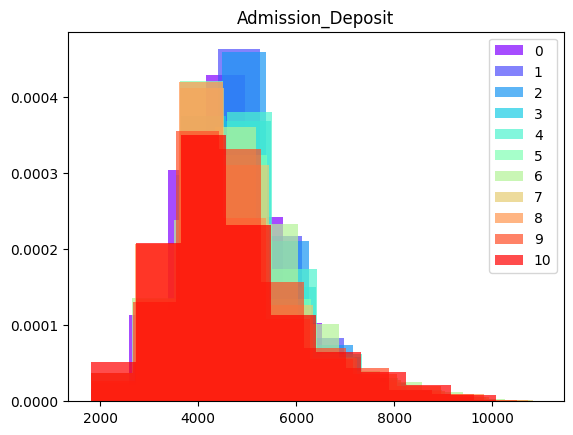

In [2]:
num_classes = 11
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))

for column_values in columns:
    plt.figure()

    for i in range(num_classes):
        plt.hist(data[data['Stay'] == i][column_values], color=colors[i], label=str(i), alpha=0.7, density=True)

    plt.title(column_values)
    plt.legend()

plt.show()

In [3]:
def normalizer(x_train, y_train, oversampler = False):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  if oversampler:
    over = RandomOverSampler()
    x_train, y_train = over.fit_resample(x_train, y_train)

  data = np.hstack((x_train, np.reshape(y_train, (-1, 1))))

  return data, x_train, y_train

In [7]:
prepped_data, x_train, y_train = normalizer(x_train, y_train, oversampler=True)
for i in range(num_classes):
  print(sum(y_train == i))

87491
87491
87491
87491
87491
87491
87491
87491
87491
87491
87491


In [12]:
pd.DataFrame(prepped_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.424335,-0.557227,1.603468,-0.058651,1.859428,-0.021342,1.031114,-0.741786,-0.070931,-1.132513,-1.658064,-0.827212,0.361709,0.108576,0.0
1,0.424335,0.083963,1.603468,-0.914607,1.859428,1.203708,1.031114,-0.741786,-0.070931,0.355270,-1.658064,-0.827212,0.361709,0.978596,4.0
2,1.714839,-1.198416,-1.073571,-0.914607,-1.755985,1.203708,0.442007,-0.741786,-0.070931,0.355270,-1.658064,-0.827212,0.361709,-0.029893,3.0
3,-0.220917,-0.877821,0.264949,-0.914607,1.859428,-0.021342,-0.147100,-0.741786,-0.070931,0.355270,-1.658064,-0.827212,0.361709,2.078007,4.0
4,-0.220917,-0.877821,0.264949,-0.914607,1.859428,1.203708,-0.147100,-0.741786,-0.070931,0.355270,-1.658064,-0.827212,0.361709,0.648272,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962396,-0.220917,-0.877821,0.264949,0.797305,0.051722,1.203708,-0.147100,-0.741786,0.146791,-1.132513,0.814772,0.651383,-0.686357,-1.173514,10.0
962397,1.714839,-1.198416,-1.073571,-1.770563,-3.563691,1.203708,0.442007,1.503012,-1.159542,0.355270,0.814772,0.281734,-0.162324,-0.366055,10.0
962398,-0.220917,-0.877821,0.264949,-0.058651,0.051722,1.203708,-0.147100,0.380613,0.146791,-1.132513,0.814772,1.390680,-0.162324,-1.010020,10.0
962399,-0.866169,-1.198416,-1.073571,1.653260,-1.755985,-1.246391,0.442007,1.503012,0.146791,0.355270,0.814772,5.826463,-0.162324,-1.377046,10.0
